<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lecture12_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
install.packages("nycflights13")
install.packages("babynames")
install.packages("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(tidyverse)
library(babynames)
library(stringr)
library(nycflights13)

# Lecture 12: Strings and text data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand the basics of working with strings in R.
* Convert data to strings.
* Extract data from strings.
</div>

These notes correspond to Chapter 15 of your book.


## Strings in R
We have already encountered strings at many points in the class, but we didn't really discuss the details of how they work. 

In R, strings must be quoted:

In [ ]:
my_string <- "MLE stands for Maximum Likelihood Estimate"
my_string

[1] "MLE stands for Maximum Likelihood Estimate"

In [ ]:
# You can use single quotes too
# Internally, it's actually using single quotes

my_string <- 'MLE stands for Maximum Likelihood Estimate'
my_string

[1] "MLE stands for Maximum Likelihood Estimate"

In [ ]:
# Even tho these r numbers, b/c they're inside quotes, they end up being text/string
my_string2<-'123'
my_string2

[1] "123"

Now what if I want `my_string` to contain a quotation?
```
> my_string <- ""MLE" stands for "Maximum Likelihood Estimate""
Error in parse(text = x, srcfile = src): <text>:1:16: unexpected symbol
1: mystring3 <- ""MLE
                   ^
Traceback:
```

In [ ]:
# This will produce an error:
# my_string3 <- ""MLE" stands for "Maximum Likelihood Estimate""

In [ ]:
# To fix this, you can have a double quotes on the inside, single quotes on the outside
my_string3 <- '"MLE" stands for "Maximum Likelihood Estimate"'
my_string3

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""

To create a string containing double quotes, while using double quotes to create it, you must *escape* the quotes using a backslash (`\`):

In [ ]:
my_string3 <- "\"MLE\" stands for \"Maximum Likelihood Estimate\""
my_string3 

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""

What if you actually want a backslash? Then you need to escape it as well:

In [ ]:
"\\ is the backslash character"

[1] "\\ is the backslash character"

The printed representation of strings shows the escapes:

In [ ]:
print("\"MLE\" stands for \"Maximum Likelihood Estimate\"")

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""


Use `str_view()` to see the raw contents of the string. 

In [ ]:
str_view(my_string)

[1] │ 'MLE' stands for 'Maximum Likelihood Estimate'

## Special characters

When used inside a string, `\"`, `\'`, and `\\`, are "special characters". Some other special characters you will encounter:

- `\n` (new line), 
- `\t`, tab. 
- `\u` or `\U`: Unicode.

### ASCII and unicode
Early computers could only read and write the ASCII character set, essentially just roman letters, numbers and some punctuation.

Nowadays, computers need to be able to understand alphabets from all over the world. For this we have *Unicode*.

You can print characters if you know their unicode using `\u`. For example, the copyright character has unicode `00A9`. Wikipedia has [a complete list](https://en.wikipedia.org/wiki/List_of_Unicode_characters).

In [ ]:
# ASCII = American Standard Code for Information Interchange

In [ ]:
print("\u00A9")

[1] "©"


## String functions in R

Through the `stringr` package, `tidyverse` has a lot of useful functions for combining strings.

In [ ]:
# Btw, we always use tidyverse b/c its functions r better/more efficient. Takes less time, uses less RAM.

### Combining strings
Combining two strings into one is called "concatenation" by computer scientists and "combining strings" by everyone else. `concatenate` is hard to type, so it is abbreviated `str_c`:

In [31]:
c("a", "b", "c") %>% print  # notice the difference!
str_c("a", "b", "c") 
# "Let us con", 
#       " / ", 
#       "catenate strings!") %>% print

[1] "a" "b" "c"


[1] "abc"

Another use of `str_c` is to combine multiple strings into one with a separator:

In [32]:
str_c("one", "two", "ten", sep = ", ") # can provide a separator

[1] "one, two, ten"

If you already know some R, you might recognize this as being equivalent to 
```{r} 
paste("one", "two", "ten", sep=", ")
```

### Flattening strings
`str_flatten` will take a vector of strings and flatten them into one string.

In [33]:
# list all the air carriers flying out of each airport
distinct(flights, origin, carrier) %>% 
  group_by(origin) %>% 
    summarize(carrier = str_flatten(carrier, ", ")) # all the values that are under carrier, flatten them into one vector, separated by a comma

origin carrier                                           
1 EWR    UA, B6, AA, MQ, DL, US, EV, AS, WN, 9E, VX, OO    
2 JFK    AA, B6, UA, DL, US, VX, MQ, 9E, HA, EV            
3 LGA    UA, DL, EV, AA, B6, MQ, WN, FL, US, F9, 9E, YV, OO

### Extracting pieces of a string
Sometimes we want only a portion of a string, say the first few or last characters. The `str_sub(str, start, stop)` function will extract substrings from a larger string. (Negative indexing will counts from the end.)

In [34]:
str_sub('spring break!', 1, 2)  # first two characters
str_sub('was fun', -2, -1)  # last two characters
str_sub('but now', 3, 5)  # middle characters
str_sub('it\'s done', 2, -2) # everything except the first and last

[1] "sp"

[1] "un"

[1] "t n"

[1] "t's don"

In [37]:
str_sub('spring break') # default is 1,-1; which means that start w/ first letter, end w/ last letter

[1] "spring break"

In [38]:
# if you want s to a: 
str_sub('spring break',1,-2)

[1] "spring brea"

## Extracting data from strings
Often in real data we have multiple columns of data crammed into one column. In fact, we saw this last lecture when looking at IMDB data:

In [39]:
library(rvest)
imdb.250 <- read_html("https://www.imdb.com/chart/top/") %>% html_element('table') %>% html_table() %>% select(2:4)
head(imdb.250)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




Rank & Title                                       IMDb Rating
1 1.\n      The Shawshank Redemption\n        (1994) 9.2        
2 2.\n      The Godfather\n        (1972)            9.2        
3 3.\n      The Dark Knight\n        (2008)          9.0        
4 4.\n      The Godfather Part II\n        (1974)    9.0        
5 5.\n      12 Angry Men\n        (1957)             9.0        
6 6.\n      Schindler's List\n        (1993)         8.9        
  Your Rating                                                                                                               
1 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
2 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
3 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
4 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
5 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
6 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen

The `Rank & Title` column contains three pieces of data: rank, title, and year of release.

## `separate_` functions
`tidyverse` has some built-in functions designed to break apart and combine string data:
- `separate_longer_delim`, `separate_longer_position`: combine multiple columns of string data into one.
- `separate_wider_delim`, `separate_wider_position`: extract string data into multiple columns.
These functions work analogously to `pivot_{wider,longer}`.


`separate_wider_delim` converts a delimited string into multiple columns of data. `separate_wider_position` does the same, but uses a fixed position.

In [40]:
df3 <- tibble(x = c("a10.1.2022", "b10.2.2011", "e15.1.2015"))
df3 %>%  separate_wider_delim(
    x,
    delim = ".", # i want to break the values up by the period 
    names = c("code", "edition", "year")
  )


code edition year
1 a10  1       2022
2 b10  2       2011
3 e15  1       2015

In [44]:
# Problem: separate the string data under "Rank & Title" in imdb.250
# Hint: there is a new line character in the string 

imdb.250 %>% separate_wider_delim(
  'Rank & Title', # we need to use quotes b/c there r spaces 
  delim = "\n",
  names=c("Rank","Title","Year")
) %>% head

Rank Title                          Year           IMDb Rating
1 1.         The Shawshank Redemption         (1994) 9.2        
2 2.         The Godfather                    (1972) 9.2        
3 3.         The Dark Knight                  (2008) 9.0        
4 4.         The Godfather Part II            (1974) 9.0        
5 5.         12 Angry Men                     (1957) 9.0        
6 6.         Schindler's List                 (1993) 8.9        
  Your Rating                                                                                                               
1 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
2 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
3 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
4 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
5 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen
6 12345678910\n        \n        \n            \n            NOT YET RELEASED\n             \n            \n            Seen

## Harry Potter
Let's practice some string analysis by looking at the text of Harry Potter:
![harry potter](https://images-na.ssl-images-amazon.com/images/I/51HSkTKlauL._SX346_BO1,204,203,200_.jpg)

In [45]:
remotes::install_github("bradleyboehmke/harrypotter")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp4DmK5d/remotes775f465187/bradleyboehmke-harrypotter-51f7146/DESCRIPTION’ ... OK
* preparing ‘harrypotter’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘harrypotter_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
library(harrypotter)

In [47]:
str(philosophers_stone)
ch1 <- philosophers_stone[17]

 chr [1:17] "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfe"| __truncated__ ...


`philosophers_stone` is a list containing seventeen entries: one for each chapter of "Harry Potter and the Sorcerer's Stone" (titled differently in the U.K.)

Instead of reading Harry Potter, we will analyze it like a data set.

Each entry of `philosophers_stone` is a *string*. There is one string per chapter, so they are pretty long. To figure out how long a string is, we can use the `str_length()` command:

In [51]:
ch1 <- philosophers_stone[[1]]
# length(philosophers_stone)
ch1 %>% print

[1] "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.　　The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they ha

### Exercise
What is the longest (in number of characters) chapter in Philosopher's Stone?

In [49]:
str_length('abc xyz')

[1] 7

In [54]:
# For each of the 17 chapters, these are the character counts:
str_length(philosophers_stone) 

[1] 25928 19181 21570 20429 37699 35057 25344 17249 28273 24211 19222 30782
[13] 18319 19591 29006 36464 31105

In [55]:
# Make a tibble out of this data:
tibble(text=philosophers_stone,
        ch_length=str_length(text))%>%
          select(ch_length)

ch_length
1  25928    
2  19181    
3  21570    
4  20429    
5  37699    
6  35057    
7  25344    
8  17249    
9  28273    
10 24211    
11 19222    
12 30782    
13 18319    
14 19591    
15 29006    
16 36464    
17 31105

Now say we wanted to find the chapter with the most words. Is it necessarily the same?

In [62]:
# To find the word count for each of the 17 chapters, use str_count:
tibble(text=philosophers_stone,
        chara_length=str_length(text),
        word_count=str_count(text,'\\w'))%>%
          select(chara_length,word_count)

chara_length word_count
1  25928        19888     
2  19181        14780     
3  21570        16629     
4  20429        15251     
5  37699        28637     
6  35057        26400     
7  25344        19501     
8  17249        13445     
9  28273        21601     
10 24211        18629     
11 19222        14697     
12 30782        23547     
13 18319        14052     
14 19591        14845     
15 29006        22044     
16 36464        27422     
17 31105        23444

In [92]:
# How many spaces are there b/w words: 
tibble(text=philosophers_stone,
        chara_length=str_length(text),
        word_count=str_count(text,'\\w'),
        spaces_count=str_count(text,'\\s'))%>%
          select(chara_length,word_count,spaces_count)%>%
          print

# A tibble: 17 × 3
   chara_length word_count spaces_count
          <int>      <int>        <int>
 1        25928      19888         4751
 2        19181      14780         3574
 3        21570      16629         3999
 4        20429      15251         3900
 5        37699      28637         6927
 6        35057      26400         6636
 7        25344      19501         4695
 8        17249      13445         3169
 9        28273      21601         5174
10        24211      18629         4472
11        19222      14697         3531
12        30782      23547         5750
13        18319      14052         3324
14        19591      14845         3647
15        29006      22044         5316
16        36464      27422         6818
17        31105      23444         5755


In [90]:
# Longest chapter:
tibble(text=philosophers_stone,
        chara_length=str_length(text),
        word_count=str_count(text,'\\w'),
        spaces_count=str_count(text,'\\s'))%>%
          select(chara_length,word_count,spaces_count)%>%
          arrange(desc(word_count)) # ch9

chara_length word_count spaces_count
1  37699        28637      6927        
2  36464        27422      6818        
3  35057        26400      6636        
4  30782        23547      5750        
5  31105        23444      5755        
6  29006        22044      5316        
7  28273        21601      5174        
8  25928        19888      4751        
9  25344        19501      4695        
10 24211        18629      4472        
11 21570        16629      3999        
12 20429        15251      3900        
13 19591        14845      3647        
14 19181        14780      3574        
15 19222        14697      3531        
16 18319        14052      3324        
17 17249        13445      3169

In [65]:
tibble(text=c('a','b','c')) 
# takeaway: each of the chapters in the book is a vector

text
1 a   
2 b   
3 c

If you scroll through `ch1` a bit, you'll notice that there are some funny characters which don't appear in the books:

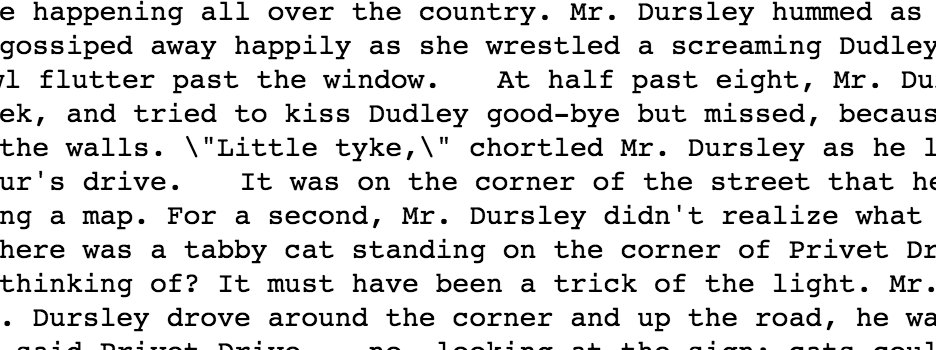

Let's see how this works for Harry Potter. Where does the first quotation in `ch1` occur? To find this, we will use the 

    str_locate(<string>, <substring>)
    
function:

In [ ]:
str_locate(ch1, "\"")  # <---- note the escape.

start end
[1,] 43    43

Note the escape: we are searching `ch1` for the first occurence of the character `"`.

This tells us that the first quote occurs at position 2150 of `ch1`. To view a portion of a string, we can use the 

    str_sub(<string>, <start>, <end>)

command:

In [ ]:
str_sub(ch1, 2150, 2250) %>% print
# writeLines(str_sub(ch1, 2150, 2200))

[1] "\"Little tyke,\" chortled Mr. Dursley as he left the house. He got into his car and backed out of numbe"


### Exercise

(About) how many quotes are there in Ch.1? (Hint: use `str_count()`).

In [71]:
# How many quotes?
str_count(ch1,"\"")

[1] 205

### Exercise
What's the last sentence of Chapter 1?

In [83]:
# Last sentence, ch1
# Strat: -1 gets the last letter 
str_sub(ch1,-187)

[1] " He couldn't know that at this very moment, people meeting in secret all over the country were holding up their glasses and saying in hushed voices: \"To Harry Potter -- the boy who lived!"

## 🤔 Quiz

Which chapter closes with the word _Voldemort_?

<ol style="list-style-type: upper-alpha;">
    <li>5</li>
    <li>13</li>
    <li>16</li>
    <li>17</li>
    <li>19</li>
</ol>



In [85]:
# Voldemort
str_sub(philosophers_stone,-15)%>%print

 [1] " boy who lived!"    "udley's gang.　　"  "g to come in.　　" 
 [4] "the pockets.\"　　" "rid had gone.　　"  " castle door.　　" 
 [7] "dream at all.　　"  "o tell Harry?　　"  "thirteen was.　　" 
[10] " one of them.　　"  "with himself.　　"  "nal question.　　" 
[13] "y,\" said Ron.　　" "of the tower.　　"  "Just in case.　　" 
[16] "en Voldemort.　　"  "r....\"　　THE END"


## Converting text into a dataframe
To do more interesting things, next we'll create dataframes from text. To do this we'll use the `longer` versions of `separate`. Here is how it works:

In [ ]:
df1 <- tibble(x = c("a,b,c", "d,e", "f"))
# separate df1 longer by delimiter

x
1 a
2 b
3 c
4 d
5 e
6 f

In [ ]:
df2 <- tibble(x = c("1211", "131", "21"))
# separate df2 longer by position

x
1 1
2 2
3 1
4 1
5 1
6 3
7 1
8 2
9 1

Let's apply this to `ch1`. First we'll create a dataframe of all the "words" in Harry Potter:

In [ ]:
# separate ch1 into words

Now we have a rough idea of the types of words that are found in chapter 1. But there is lots of cleaning up that needs to happen. 

In [ ]:
# clean up the dataframe

## 🤔 Quiz

About how many words are there in Ch. 1?

<ol style="list-style-type: upper-alpha;">
    <li>Less than 1000</li>
    <li>1000-2000</li>
    <li>2000-3000</li>
    <li>3000-6000</li>
    <li>More than 60000</li>
</ol>

Now let's create a dataframe of *all* the text in Philosopher's Stone:

In [ ]:
# dataframe with all the text

## 🤔 Quiz

Which chapter has the most words?

<ol style="list-style-type: upper-alpha;">
    <li>2</li>
    <li>4</li>
    <li>5</li>
    <li>8</li>
    <li>14</li>
</ol>